In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,LSTM
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df=pd.read_csv(r"E:\ptdb normal\ptbdb_normal.csv")
print(df)


      1.000000000000000000e+00  9.003241658210754395e-01  \
0                     1.000000                  0.794681   
1                     0.909029                  0.791482   
2                     1.000000                  0.478893   
3                     1.000000                  0.867238   
4                     0.948983                  0.505265   
...                        ...                       ...   
4040                  1.000000                  0.929586   
4041                  1.000000                  0.637579   
4042                  1.000000                  0.872574   
4043                  0.915983                  0.529373   
4044                  1.000000                  0.838643   

      3.585899472236633301e-01  5.145867168903350830e-02  \
0                     0.375387                  0.116883   
1                     0.423169                  0.186712   
2                     0.056760                  0.064176   
3                     0.201360         

In [3]:
df2=pd.read_csv(r"E:\ptdb abnormal\ptbdb_abnormal.csv")
print(df2)


       9.322328567504882812e-01  8.696785569190979004e-01  \
0                      1.000000                  0.606941   
1                      1.000000                  0.951613   
2                      0.977819                  0.899261   
3                      0.935618                  0.801661   
4                      0.925265                  0.433352   
...                         ...                       ...   
10500                  0.981409                  1.000000   
10501                  0.906250                  0.922379   
10502                  1.000000                  0.867971   
10503                  1.000000                  0.984672   
10504                  0.997886                  0.700317   

       8.861859440803527832e-01  9.296264052391052246e-01  \
0                      0.384181                  0.254237   
1                      0.923963                  0.853303   
2                      0.230129                  0.032348   
3                      

In [4]:
g=np.zeros((1200,188,1))
h=np.zeros((1200,1))
for i in range(1200):
    g[i,:,:]=np.array(np.expand_dims(df.iloc(axis=0)[i],-1))
    h[i,:]=np.array(1)
    
    

In [5]:
g.shape

(1200, 188, 1)

In [6]:
h[1:20]


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [7]:
#g=np.zeros((len(df)+len(df2),188,1))
#h=np.zeros((len(df)+len(df2),1))
for i in range(1200):
    g[i,:,:]=np.array(np.expand_dims(df2.iloc(axis=0)[i],-1))
    h[i,:]=np.array(0)

Text(0.5, 1.0, 'X train set')

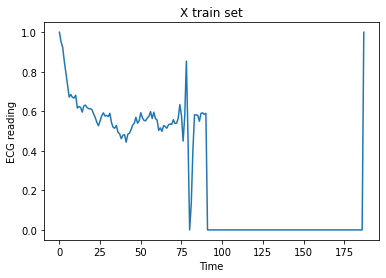

In [13]:
plt.plot(g[1])
plt.ylabel('ECG reading')
plt.xlabel('Time')
plt.title('X train set')

[0.]


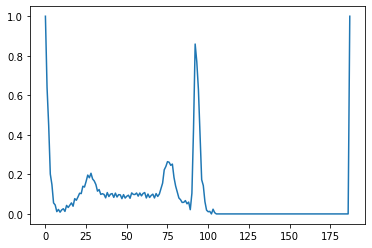

In [9]:
plt.plot(g[100])
print(h[10])


In [10]:
i=Input(shape=g[0].shape)
x=LSTM(50)(i)
x=Dense(1,activation="sigmoid")(x)
model=Model(i,x)

In [11]:
 r=model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
 b=model.fit(g,h,validation_split=0.1,epochs=1)


34/34 [==============================] - 2s 69ms/step - loss: 0.3254 - accuracy: 0.9407 - val_loss: 0.0033 - val_accuracy: 1.0000


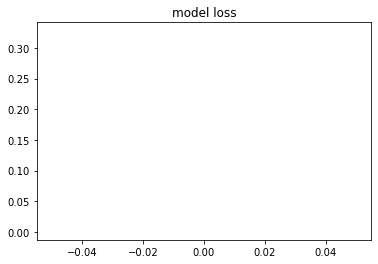

In [12]:
plt.plot(b.history['loss'])
plt.plot(b.history['val_loss'])
plt.title('model loss')
plt.show()

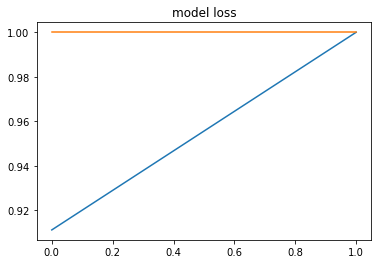

In [13]:
plt.plot(b.history['accuracy'])
plt.plot(b.history['val_accuracy'])
plt.title('model loss')
plt.show()